In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [18]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_chain_emcee(item = i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

loading results/emcee0/
done loading
access result with:
['config', 'full_chain', 'flat_chain']



In [22]:
results.keys()
?dddm.load_chain_emcee

In [20]:
selected_keys = []
for i in results.keys():
    if '005prc-' in results[i]['config']['notes']:
#         print(i, ",")
        selected_keys.append(i)
selected_keys

[]

In [9]:
type(np.log10(50))

numpy.float64

---0---


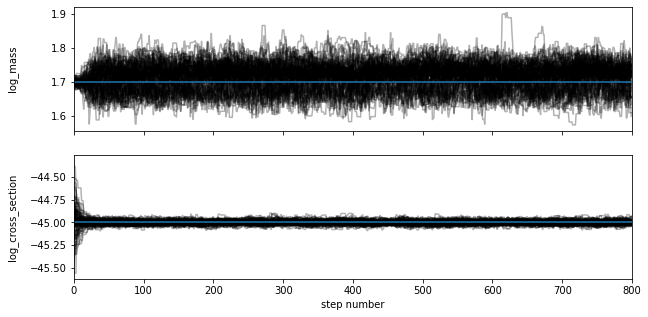

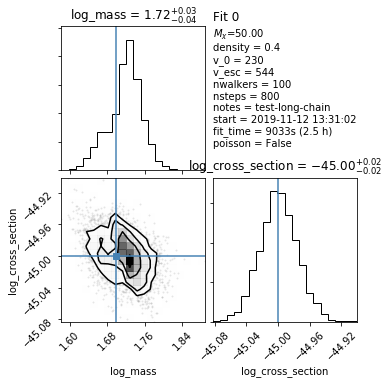

In [24]:
for key in results.keys():
# for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    try:       
        info = "$M_\chi}$=%.2f"%10 ** np.float(result['config']['mw'])
        for prior_key in result['config']['prior'].keys():
            try:
                mean = result['config']['prior'][prior_key]['mean']
                info += f"\n{prior_key} = {mean}"
            except KeyError:
                pass
         
        nsteps, nwalkers, ndim = np.shape(result['full_chain'])
        
#         info += "\npoisson = %s"%result['config']['poisson']   
        info += "\nnwalkers = %s"%nwalkers
        info += "\nnsteps = %s"%nsteps
        for str_inf in ['notes', 'start', 'fit_time', 'poisson', 'nwalkers', 'nsteps']:
            try: 
                info += f"\n{str_inf} = %s"%result['config'][str_inf]
                if str_inf is 'start':
                    info = info[:-7]
                if str_inf == 'fit_time':
                    info += 's (%.1f h)'%(result['config'][str_inf]/3600.)
            except KeyError:
                pass
#         labels = ['log_mass',
#                         'log_cross_section',
#                         'v_0',
#                         'v_esc',
#                         'density'][:ndim]
        labels = ['log_mass',
                        'log_cross_section',
                        'v_0',
                        'v_esc',
                        'density'][:ndim]
        truths = [result['config']['mw'],
                  result['config']['sigma'],
                  result['config']['v_0'],
                  result['config']['v_esc'],
                  result['config']['rho_0']
                  ][:ndim]
        
        fig, axes = plt.subplots(len(labels), figsize=(10, 5), sharex=True)
        samples = result['full_chain']
        for i in range(len(labels)):
            ax = axes[i]
            ax.plot(samples[:, :, i], "k", alpha=0.3)
            ax.axhline(truths[i])
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(labels[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
            
        axes[-1].set_xlabel("step number")
        plt.savefig(f"results/{dddm.default_emcee_save_dir()}{key}/walkers{key}.png", dpi = 200)
        plt.show()
        
        fig= corner.corner(result['flat_chain'],
                            labels = labels,
                            truths = truths,
#                             quantiles=[0.05, 0.5, 0.95],
                           show_titles=True
                           );
#         fig.suptitle(f"Fit {key}\n\n\n")
        fig.axes[1].set_title(f"Fit {key}", loc = 'left')
        fig.axes[1].text(0,1,info, verticalalignment = 'top')
        plt.savefig(f"results/{dddm.default_emcee_save_dir()}{key}/corner{key}.png", dpi = 200)
        plt.show()
        
    except AssertionError:
        pass
    except ValueError:
        print(f"In one of the dimentions the walkers did not walk resulting in an empty range."
              f"This is not good, delete threse results. Info\n{info}")

In [11]:
import multihist as mh

In [12]:
# np.shape(np.random.normal(1, 1, 10**6))

In [13]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=45, range=[[1, 3], [-45.5, -44.3]], axis_names=['x', 'y'])
for i in [57, 60, 61]:
    m2.add(*results[i]['flat_chain'].T)
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [10, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(50), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(250), c = 'r', alpha = 0.5, linestyle = '--')
plt.axhline(-45, c = 'r', alpha = 0.5, linestyle = '--')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))

m2.plot(log_scale = True)

plt.show()

KeyError: 57

In [ ]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=45, range=[[1, 3], [-45.5, -44.3]], axis_names=['x', 'y'])
for i in [54, 56, 55]:
    m2.add(*results[i]['flat_chain'].T[:2])
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [10, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(50), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(250), c = 'r', alpha = 0.5, linestyle = '--')
plt.axhline(-45, c = 'r', alpha = 0.5, linestyle = '--')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()

In [ ]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=45, range=[[1, 3], [-45.5, -44.3]], axis_names=['x', 'y'])
for i in [63, 56, 55]:
    m2.add(*results[i]['flat_chain'].T[:2])
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [10, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(50), c = 'r', alpha = 0.5, linestyle = '--')
plt.axvline(np.log10(250), c = 'r', alpha = 0.5, linestyle = '--')
plt.axhline(-45, c = 'r', alpha = 0.5, linestyle = '--')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()